# Business Task

Identify variables with the strongest correlation to Impressions and determine the proportion of that correlation.

This task is relevant as it helps them understand the factors that impact Impressions on Instagram. By identifying variables with strong correlation, they can optimize social media strategy to increase reach and engagement with their target audience. For example, if captions has the strongest correlation with Impressions, businesses can create more targeted and optimized captions using copy to improve post visibility. By understanding variables that drive Impressions, agencies can provide tailored social media strategies, leading to increased brand awareness and business growth.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import nltk
from scipy import stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


# Description of all data sources

The data source used is a publicly available dataset from Kaggle, titled "Instagram Reach Data" created by Aman Kumar Kharwal. The dataset includes post-level metrics such as Impressions, From Home, From Hashtags, From Explore, From Other, Saves, Comments, Shares, Likes, Profile Visits, and Follows.

The dataset contains 119 rows and 13 columns, and it was collected manually on Instagram. The dataset provides insights into the engagement and reach of Instagram posts, and it can be used to analyze the factors that impact post performance.

Overall, the Instagram Reach Data is a valuable data source for social media analysis and can provide insights into the performance of Instagram posts for businesses and social media agencies.

In [2]:
# Importing data & Looking at data
df = pd.read_csv("/kaggle/input/instagram-reach-data/Instagram data.csv", encoding = 'latin1')
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# Looking at dataset
print(df.shape)
print(df.dtypes)

(119, 13)
Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object


# Documentation of any cleaning or manipulation of data

Upon assessment of the data, several observations were made:

* No duplicate records were found in the dataset.
* There were no missing values or null values in the dataset.
* A visual assessment of the data distribution revealed several outliers in multiple columns. 
* The data appeared to be correctly formatted, and no issues were detected.

Therefore, we can conclude that the data is clean and ready for analysis. All observations have been documented, and the dataset is now suitable for use in any further analysis.




## Checking for duplicates 

The results indicates 17. However, looking at the print we confirm there aren't any duplicated rows.

In [4]:
# assume df is your DataFrame
duplicates = df[df.duplicated()]

# count the number of duplicates
num_duplicates = len(duplicates)

# print the number of duplicates
print("Number of duplicates:", num_duplicates)

# show the duplicate rows
print(duplicates)

Number of duplicates: 17
    Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
82         5055       2017           2351           298         108    101   
83         4002       3401            278           128          73    111   
84         3169       1979            707           341          32    106   
85         6168       2177           3450           153         296     82   
86         2407       1338            655           276          39     40   
87         3630       1747           1693            72          86    137   
88         2826       2108            583            76          34     67   
89         7407       2782           1938          2237         226    288   
90        10386       4137           3551          2355         205    668   
91         2998       1945            794            84         139     42   
92         3052       2608            201           121          87     63   
93         4628       2406           12

## Checking for nulls

There were no missing values or null values in the dataset.

In [5]:
# Looking at nulls
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## Identying Outliers

After analyzing the mean, max, min, and histogram of each numeric column, we have observed the presence of numerous outliers. Many of the posts are outperforming the mean. It is worth noting that none of the variables exhibit a normal distribution.

In [6]:
# Data set statistics
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


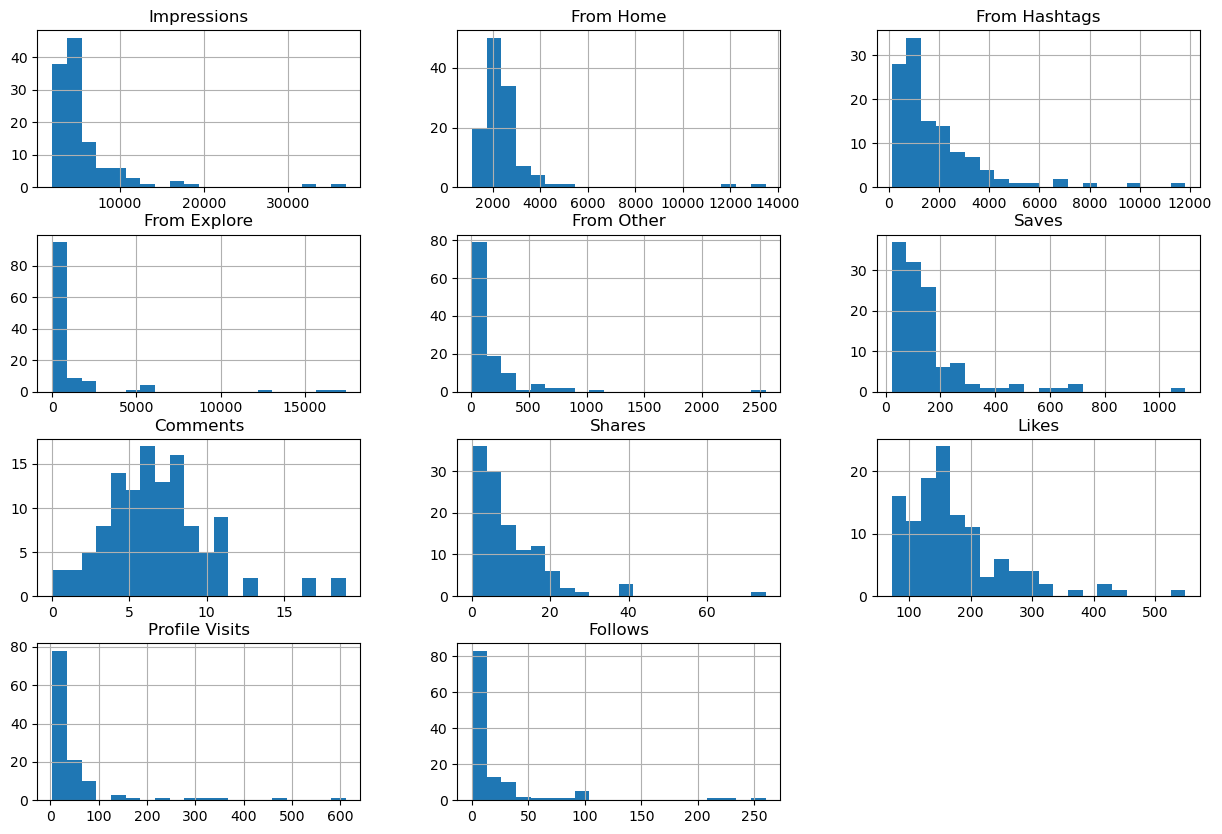

In [7]:
# plot histogram for each column
df.hist(bins=20, figsize=(15,10))

# display the plot
plt.show()

# Data Analysis

## Summary of your analysis
The data analysis consists of several visualizations and statistical analyses. The box plots show that the data is full of outliers, possibly due to some posts outperforming others. The pie chart reveals that most impressions come from Home, followed by Hashtags and Explore. The scatter plots demonstrate positive correlations between engagement metrics and impressions, as well as between profile visits and followers gained, with a 41% conversion rate. The word cloud indicates that 'thecleverprogrammer' and 'amankharwal' are the most used hashtags. The correlation matrix shows strong positive correlations between Impressions and various factors, with Comments being the only variable with negligible negative correlation. Finally, the regression analysis reveals that the model is a good fit for the data, with independent variables such as From Home, From Hashtags, and From Explore having the strongest positive relationships with ImpressionsThe data analysis consists of several visualizations and statistical analyses. The box plots show that the data is full of outliers, possibly due to some posts outperforming others. The pie chart reveals that most impressions come from Home, followed by Hashtags and Explore. The scatter plots demonstrate positive correlations between engagement metrics and impressions, as well as between profile visits and followers gained, with a 41% conversion rate. The word cloud indicates that 'thecleverprogrammer' and 'amankharwal' are the most used hashtags. The correlation matrix shows strong positive correlations between Impressions and various factors, with Comments being the only variable with negligible negative correlation. Finally, the regression analysis reveals that the model is a good fit for the data, with independent variables such as From Home, From Hashtags, and From Explore having the strongest positive relationships with Impressions


## Box Plots 



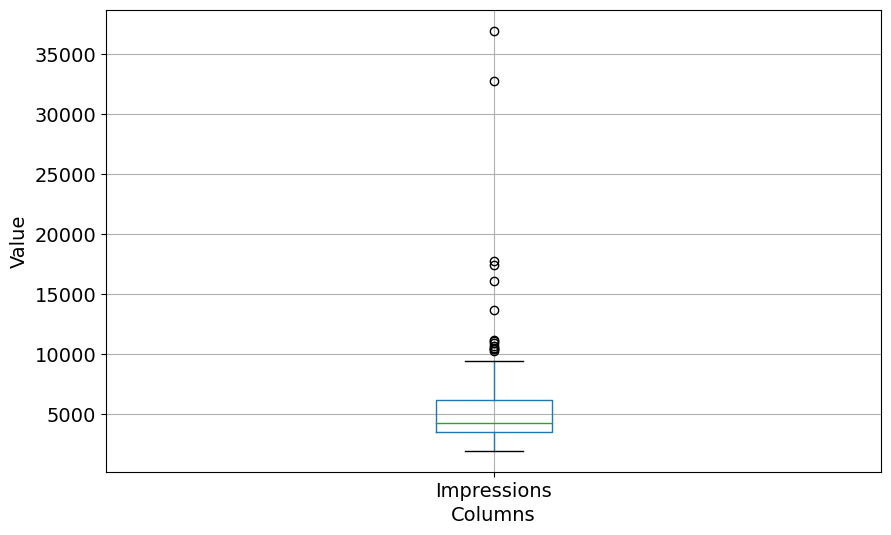

In [8]:
# Set figure size
plt.figure(figsize=(10,6))

# Set font size
plt.rcParams.update({'font.size': 14})

# Create box plot for each column
df.boxplot(column=['Impressions'])

# Set x-axis label
plt.xlabel('Columns')

# Set y-axis label
plt.ylabel('Value')

# Show the plot
plt.show()

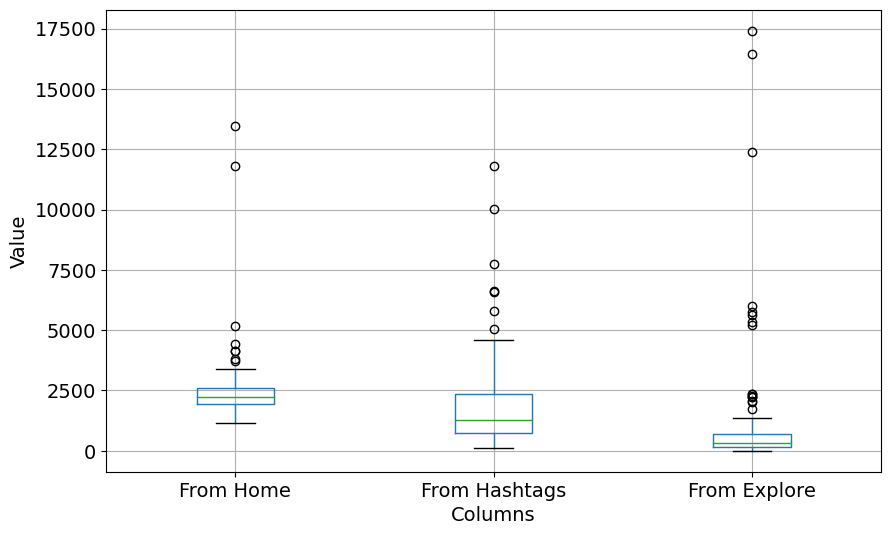

In [9]:
# Set figure size
plt.figure(figsize=(10,6))

# Set font size
plt.rcParams.update({'font.size': 14})

# Create box plot for each column
df.boxplot(column=['From Home', 'From Hashtags', 'From Explore'])

# Set x-axis label
plt.xlabel('Columns')

# Set y-axis label
plt.ylabel('Value')

# Show the plot
plt.show()

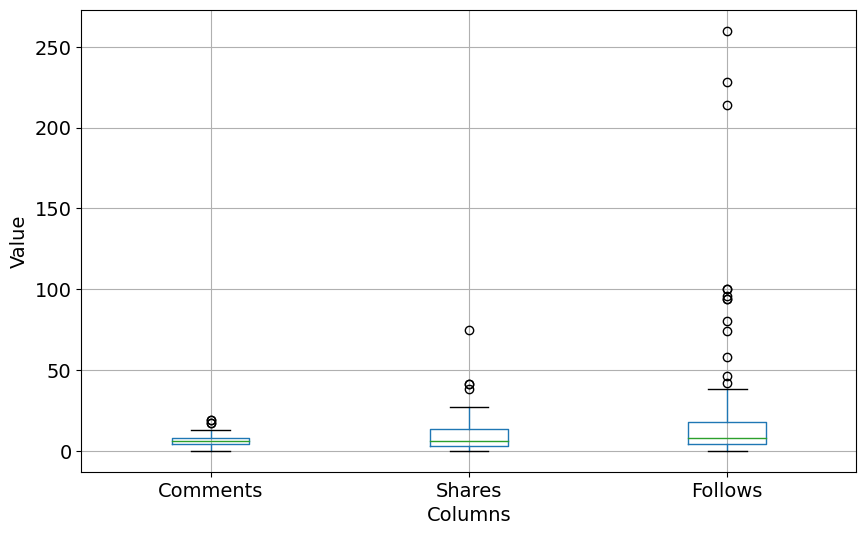

In [10]:
# Set figure size
plt.figure(figsize=(10,6))

# Set font size
plt.rcParams.update({'font.size': 14})

# Create box plot for each column
df.boxplot(column=['Comments', 'Shares', 'Follows'])

# Set x-axis label
plt.xlabel('Columns')

# Set y-axis label
plt.ylabel('Value')

# Show the plot
plt.show()

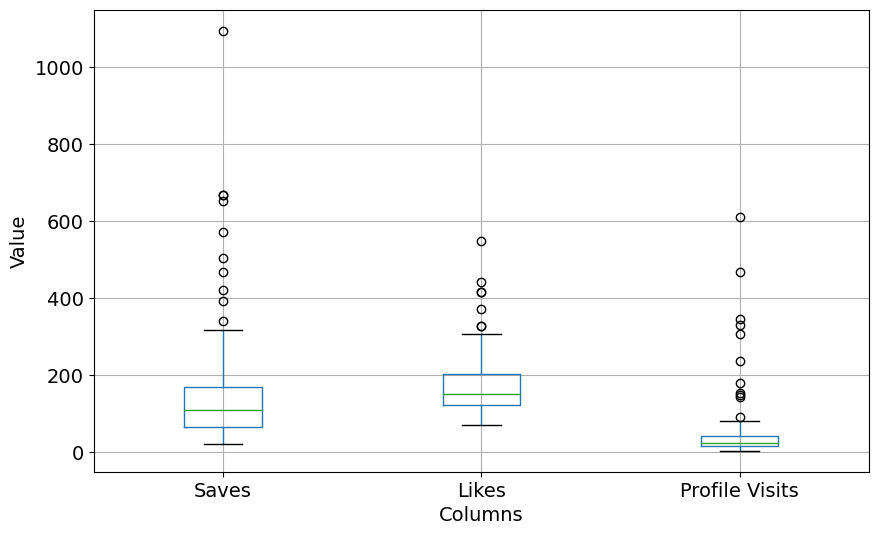

In [11]:
# Set figure size
plt.figure(figsize=(10,6))

# Set font size
plt.rcParams.update({'font.size': 14})

# Create box plot for each column
df.boxplot(column=['Saves', 'Likes', 'Profile Visits'])

# Set x-axis label
plt.xlabel('Columns')

# Set y-axis label
plt.ylabel('Value')

# Show the plot
plt.show()

#### Box Plots Takeaway

Looking at the box plots for each of the numeric variables, we can see that the data is full of outliers. One possible explanation is that many posts are outperforming the others by a significant margin.Looking at the box plots for each of the numeric variables, we can see that the data is full of outliers. One possible explanation is that many posts are outperforming the others by a significant margin.

## Pie Chart - Impressions on Instagram Posts From Various Sources

In [12]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

#### Pie Chart Takeaway
Most impresions are coming From Home 44.1%. Its follow by Hashtags 33.6% and 19.2% From Explore


## Scatter Plots

In [13]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [14]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [15]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [16]:
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [17]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [18]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


#### Scatter Plots Takeaway
As expected, there are positive correlations between various engagement metrics and impressions: likes, comments, shares, and post saves. Additionally, there is a positive correlation between profile visits and followers gained. Notably, the conversion rate (calculated as the sum of follows divided by total profile visits) is at 41%.As expected, there are positive correlations between various engagement metrics and impressions: likes, comments, shares, and post saves. Additionally, there is a positive correlation between profile visits and followers gained. Notably, the conversion rate (calculated as the sum of follows divided by total profile visits) is at 41%.

## Caption vs. Impressions analysis

To analyze the captions in the dataset and identify keywords that are associated with higher reach, you can use natural language processing (NLP) techniques. 

This code snippet performs the following steps:

Defines a function clean_and_tokenize() to clean and tokenize the captions
Uses CountVectorizer from scikit-learn to create a document-term matrix from the cleaned captions
Calculates the frequency of each token and prints the top 10 keywords
Analyzes the correlation between each keyword and reach (using 'Impressions' as a proxy for reach)

In [19]:
# define a function to clean and tokenize the text
def clean_and_tokenize(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = ''.join(c for c in text if c not in '.,?!')
    # tokenize the text
    tokens = nltk.word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if not t in stop_words]
    return tokens

In [20]:
# create a document-term matrix
vectorizer = CountVectorizer(tokenizer=clean_and_tokenize)
dtm = vectorizer.fit_transform(df['Caption'])

# calculate the frequency of each token
freqs = zip(vectorizer.get_feature_names_out(), dtm.sum(axis=0).tolist()[0])
freqs = sorted(freqs, key=lambda x: x[1], reverse=True)

### Top 10 Keywords in Caption by Frequency

In [21]:
# print the top 10 keywords by frequency
top_keywords = [f[0] for f in freqs[:10]]
print(top_keywords)

['data', 'learning', 'science', 'python', 'learn', 'machine', 'using', 'best', 'time', 'analysis']


### Top 10 Keywords Correlation to Impressions

In [22]:
# analyze the relationship between keywords and reach
for keyword in top_keywords:
    corr = df['Impressions'].corr(df['Caption'].str.contains(keyword))
    print(f"{keyword}: {corr:.2f}")

data: -0.06
learning: -0.01
science: 0.13
python: nan
learn: -0.00
machine: 0.00
using: -0.05
best: 0.15
time: 0.05
analysis: -0.08


#### Based on the provided correlation coefficients, here are three key takeaways:

* Mentioning "best" in the caption has a moderate positive correlation with reach. Posts that mention "best" may have higher reach compared to those that don't mention it.
* Mentioning "science" in the caption has a weak positive correlation with reach. Posts that mention "science" may have slightly higher reach compared to those that don't mention it.
* Mentioning "analysis" in the caption has a weak negative correlation with reach. Posts that mention "analysis" may have slightly lower reach compared to those that don't mention it.

### Word Cload - Must Frequent words at the Caption

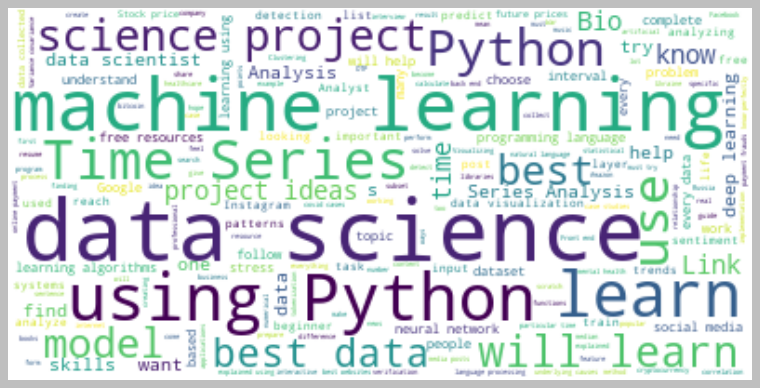

In [23]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cload Takeaway
- Must mention phrases Machine Learning, Data Science and Python


## Hashtag vs Impressions Analysis

To analyze the 'Hashtags' column and identify the keywords that are generating the most impressions, you can perform the the following:

In [24]:
# Create a new column with a list of keywords for each row
df['Keywords'] = df['Hashtags'].str.split('#').apply(lambda x: [word.strip() for word in x[1:] if word.strip() != ''])

# Explode the lists of keywords into separate rows
df = df.explode('Keywords')

In [25]:
# Group by keyword and calculate total impressions
keyword_imp = df.groupby('Keywords')['Impressions'].sum().reset_index()

# Sort by impressions in descending order
keyword_imp = keyword_imp.sort_values('Impressions', ascending=False)

### Bar Chart -  Top 20 keywords by impressions

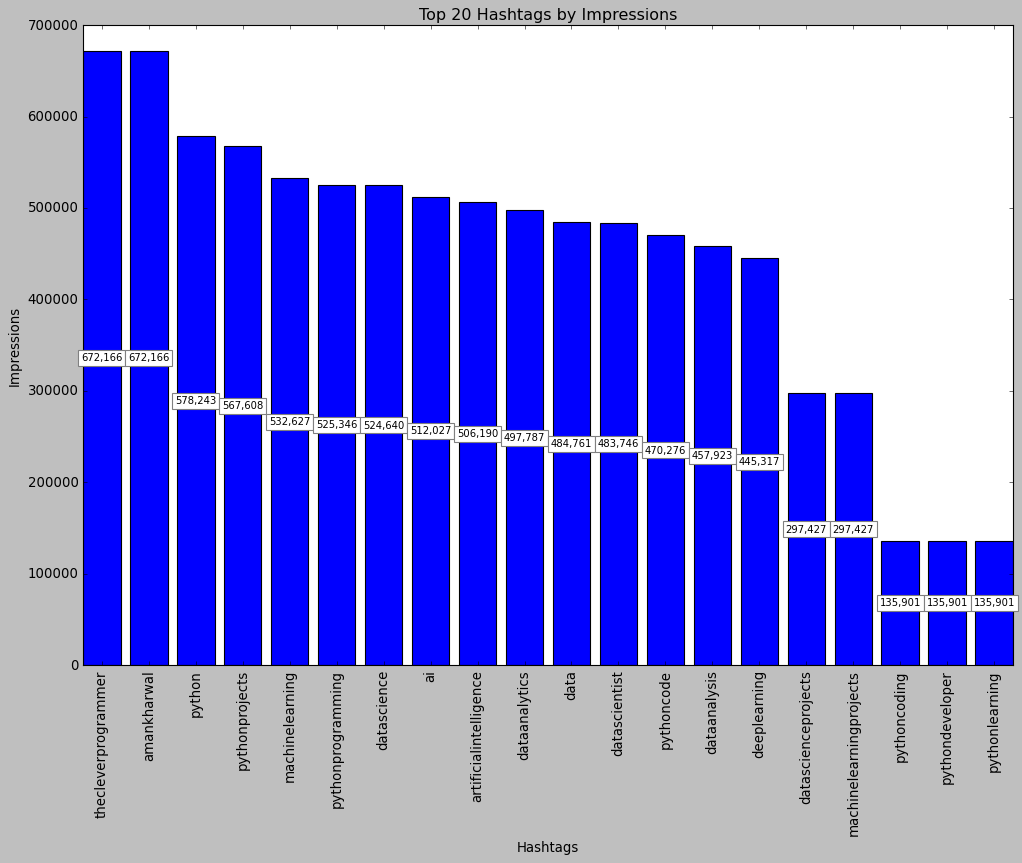

In [26]:
# Select the top 20 keywords by impressions
top_20 = keyword_imp.head(20)

# Visualize the top 20 keywords using a bar chart
plt.figure(figsize=(15, 10))
plt.bar(top_20['Keywords'], top_20['Impressions'])
plt.xticks(rotation=90)
plt.xlabel('Hashtags')
plt.ylabel('Impressions')
plt.title('Top 20 Hashtags by Impressions')

# Add labels to the bars
for i, value in enumerate(top_20['Impressions']):
    value_formatted = "{:,}".format(value) # Add commas to the value
    bbox_props = dict(boxstyle='square,pad=0.3', fc='white', ec='gray', lw=1) # Add a box around the label
    plt.text(i, value/2, value_formatted, ha='center', va='center', fontsize=9, bbox=bbox_props)

plt.show()

## Word Cload - Must Frequent words at the Hashtags

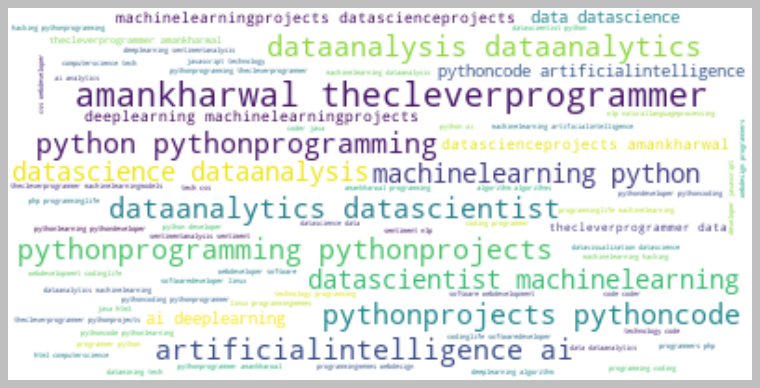

In [27]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cload Takeaway
- Must mention hashtags by a wide margin are 'thecleverprogrammer' and 'amankharwal'

## Correlation Analysis

In [28]:
# calculate pairwise correlations
corr_matrix = df.corr()
impressions_correlations = corr_matrix['Impressions'].sort_values(ascending=False)

print(impressions_correlations)

Impressions       1.000000
Follows           0.883916
From Explore      0.881480
Likes             0.856878
From Home         0.807612
Saves             0.784591
Profile Visits    0.736448
Shares            0.632677
From Hashtags     0.588737
From Other        0.558239
Comments         -0.028192
Name: Impressions, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

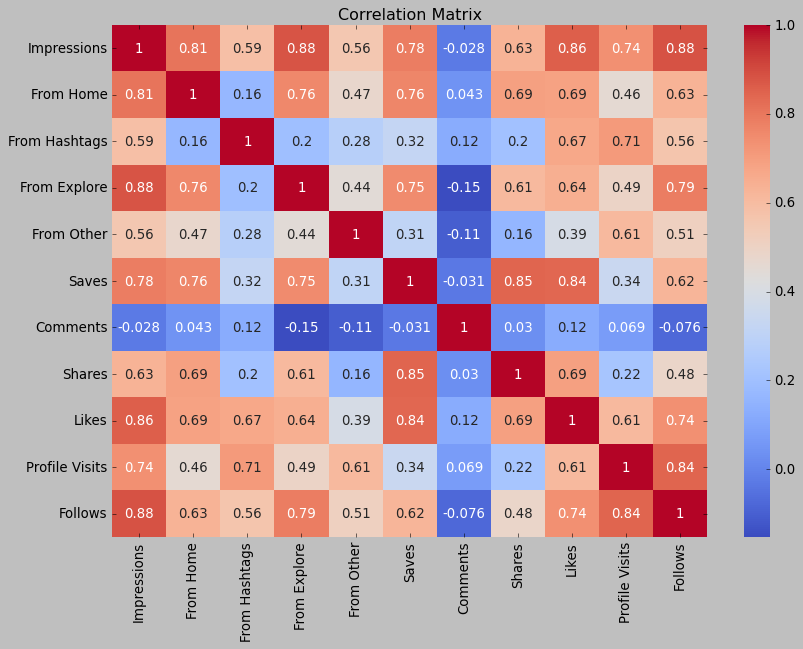

In [29]:
# Select the columns of interest
columns_of_interest = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Select the top 20 keywords by impressions
top_20 = keyword_imp.head(20)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

#### The key takeaways from this correlation matrix are:

Impressions have a strong positive correlation with Follows, From Explore, Likes, From Home, Saves, Profile Visits, Shares, and From Hashtags.
There is a weaker positive correlation between Impressions and From Other.
There is a negligible negative correlation between Impressions and Comments. Indeed Comment doesn't show a strong correlation with any of the variables

## Multiple Linear Regression Analysis

In [30]:
# perform multiple linear regression
X = sm.add_constant(df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']])
model = sm.OLS(df['Impressions'], X)
results = model.fit()

# print summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Impressions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:11:17   Log-Likelihood:                -14111.
No. Observations:                2256   AIC:                         2.824e+04
Df Residuals:                    2245   BIC:                         2.831e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             93.6703     10.687      8.

#### Regression Analysis Takeaway
This is a multiple linear regression model with Impressions as the dependent variable. The model has an extremely high R-squared value of 0.999, which indicates that the independent variables included in the model explain almost all of the variation in the dependent variable. The adjusted R-squared value is also high at 0.999, indicating that the model is a good fit for the data.

The independent variables with the strongest positive relationships with Impressions are From Home, From Hashtags, and From Explore. From Other also has a positive relationship with Impressions but to a lesser extent. Saves, Comments, and Profile Visits have negative relationships with Impressions. Shares and Follows have weaker positive relationships with Impressions.

It is worth noting that the standard errors for some of the coefficients are relatively high, which may indicate that the model is not a perfect fit for the data. Additionally, the large condition number suggests that there may be strong multicollinearity among the independent variables or other numerical problems.

# Conclusion

Based on the various analyses conducted, we can draw several conclusions about the Instagram post performance data. Firstly, the data is full of outliers, and this could be due to some posts outperforming others by a significant margin. Secondly, the majority of impressions are coming from the Home tab, followed by hashtags and the Explore tab. Thirdly, there are positive correlations between various engagement metrics such as likes, comments, shares, and post saves, as well as a positive correlation between profile visits and followers gained. The conversion rate is also noteworthy, as it stands at 41%. Fourthly, the word cloud analysis revealed that the most frequently used hashtags are 'thecleverprogrammer' and 'amankharwal'. Finally, the regression analysis showed that the model has an extremely high R-squared value of 0.999, indicating that the independent variables explain almost all of the variation in the dependent variable. Among the independent variables, "From Home," "From Hashtags," and "From Explore" show the strongest positive effect on impressions, while "Saves," "Comments," "Likes," "Profile Visits," and "Follows" have weaker effects. However, the high condition number suggests that there may be issues of multicollinearity or other numerical problems that need to be addressed. Overall, these results suggest that the independent variables in this model can predict impressions on Instagram with a high degree of accuracy.

Based on the conclusion that the OLS regression model has a high R-squared value of 0.999 and significant coefficients for most predictors, the following recommendations could be made:

Focus on optimizing content for engagement: Since engagement metrics such as "From Home", "From Hashtags", "From Explore", "Saves", "Comments", "Shares", and "Profile Visits" have significant coefficients in the model, it may be beneficial to focus on optimizing content for these metrics. This can be done by creating engaging content that resonates with the target audience, using relevant hashtags, and posting at the right time and frequency.

Monitor and analyze follower growth: The "Follows" metric also has a significant coefficient in the model, indicating that it can be a valuable metric to track. By monitoring follower growth and analyzing which content resonates best with new followers, it may be possible to optimize content for growth and engagement simultaneously.

Consider the impact of other variables: While most of the predictors in the model have significant coefficients, it is important to consider other factors that may impact impressions, such as changes in the algorithm or platform updates. By staying up-to-date with these changes and adapting strategies accordingly, it may be possible to maintain or increase impressions over time.